# **PERSONALITY PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import networkx as nx
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
import math

In [ ]:
data=pd.read_csv("mbti.csv")
data.head(10)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

In [ ]:
data.isnull().sum()

type     0
posts    0
dtype: int64

In [ ]:
data[data.columns].nunique()

type       16
posts    8673
dtype: int64

**Personality Type Distribution**

In [ ]:
# Count the occurrences of each personality type
type_counts = data['type'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Personality Type', 'Percentage']

fig = px.bar(type_counts, x='Personality Type', y='Percentage', title='Personality Type Distribution')

fig.update_layout(title_text='Personality Type Distribution')

fig.show()

**Personality Type Distribution PIE CHART**

In [ ]:
# Count the occurrences of each personality type
type_counts = data['type'].value_counts(normalize=True).reset_index()
type_counts.columns = ['Personality Type', 'Percentage']

# Group personality types with less than 2% occurrence into 'Others'
threshold = 0.011
type_counts.loc[type_counts['Percentage'] < threshold, 'Personality Type'] = 'Others'

# Create an interactive pie chart
fig = px.pie(type_counts, names='Personality Type', values='Percentage', title='Personality Type Distribution', hole=0.2)
fig.update_traces(textinfo='percent+label', pull=[0.1] + [0] * (len(type_counts) - 1))
fig.update_layout(title_text='Personality Type Distribution', showlegend=False)
fig.show()

**Average Post Length by Personality Type**

In [ ]:
# Calculate the average post length for each personality type
data['post_length'] = data['posts'].apply(len)
avg_post_length = data.groupby('type')['post_length'].mean().reset_index()

fig = px.bar(
    avg_post_length,
    x='type',
    y='post_length',
    title='Average Post Length by Personality Type',
    labels={'type': 'Personality Type', 'post_length': 'Average Post Length'},
    color_discrete_sequence=['rgb(0, 0, 225)'] * len(avg_post_length)  # Uniform intermediate red color
)
fig.update_layout(title_text='Average Post Length by Personality Type')

fig.show()

**Distribution of Personality Type Components**

In [ ]:
# Extract the personality type components
data['I_E'] = data['type'].apply(lambda x: x[0])
data['N_S'] = data['type'].apply(lambda x: x[1])
data['T_F'] = data['type'].apply(lambda x: x[2])
data['J_P'] = data['type'].apply(lambda x: x[3])

# Count the occurrences of each combination
ie_counts = data['I_E'].value_counts().reset_index()
ns_counts = data['N_S'].value_counts().reset_index()
tf_counts = data['T_F'].value_counts().reset_index()
jp_counts = data['J_P'].value_counts().reset_index()

# Create subplots for each personality type component
fig = make_subplots(rows=2, cols=2, subplot_titles=('I vs. E Distribution', 'N vs. S Distribution', 'T vs. F Distribution', 'J vs. P Distribution'))

# Bar chart for 'I vs. E'
fig.add_trace(go.Bar(x=ie_counts['index'], y=ie_counts['I_E'], marker_color='blue'), row=1, col=1)
fig.update_xaxes(title_text='I vs. E', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# Bar chart for 'N vs. S'
fig.add_trace(go.Bar(x=ns_counts['index'], y=ns_counts['N_S'], marker_color='green'), row=1, col=2)
fig.update_xaxes(title_text='N vs. S', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

# Bar chart for 'T vs. F'
fig.add_trace(go.Bar(x=tf_counts['index'], y=tf_counts['T_F'], marker_color='red'), row=2, col=1)
fig.update_xaxes(title_text='T vs. F', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

# Bar chart for 'J vs. P'
fig.add_trace(go.Bar(x=jp_counts['index'], y=jp_counts['J_P'], marker_color='purple'), row=2, col=2)
fig.update_xaxes(title_text='J vs. P', row=2, col=2)
fig.update_yaxes(title_text='Count', row=2, col=2)

fig.update_layout(title_text='Distribution of Personality Type Components', showlegend=False)
fig.show()

In [ ]:
data.head(10)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

**Personality Type Relationship Network**

In [ ]:
# Count the occurrences of each personality type
type_counts = data['type'].value_counts().reset_index()
type_counts.columns = ['Personality Type', 'Count']

# Create a graph where nodes are personality types and edges connect similar types
G = nx.Graph()

#function to determine cognitive function similarity (customize this)
def cognitive_function_similarity(type1, type2):
    # Define the cognitive functions for each personality type
    functions = {
        'I': 'Introversion', 'E': 'Extraversion',
        'N': 'Intuition', 'S': 'Sensing',
        'F': 'Feeling', 'T': 'Thinking',
        'J': 'Judging', 'P': 'Perceiving'
    }

    # Extract cognitive functions for each type
    functions_type1 = [functions[letter] for letter in type1]
    functions_type2 = [functions[letter] for letter in type2]

    # Calculate the similarity as the number of common cognitive functions
    common_functions = set(functions_type1) & set(functions_type2)
    return len(common_functions)

# Add nodes to the graph
G.add_nodes_from(type_counts['Personality Type'])

# Connect nodes based on cognitive function similarity
types = type_counts['Personality Type'].tolist()
for i in range(len(types)):
    for j in range(i + 1, len(types)):
        if cognitive_function_similarity(types[i], types[j]) >= 2:
            G.add_edge(types[i], types[j])

# Generate node positions using spring layout
pos = nx.spring_layout(G)

# Extract x and y positions for Plotly scatter plot
x_pos = [pos[node][0] for node in G.nodes]
y_pos = [pos[node][1] for node in G.nodes]

# Create a DataFrame for Plotly express
pos_df = pd.DataFrame({'Personality Type': list(G.nodes), 'X': x_pos, 'Y': y_pos})

# Create an interactive scatter plot
fig = px.scatter(
    pos_df, x='X', y='Y', text='Personality Type',
    title='Personality Type Relationship Network'
)

fig.show()


**Personality Type Distribution (Tree Plot)**

In [ ]:

fig = go.Figure(go.Treemap(
    labels=type_counts['Personality Type'],
    parents=[''] * len(type_counts),
    values=type_counts['Count'],
    texttemplate="%{label}<br>%{value}",
    textposition="middle center",
    branchvalues="total",
    marker_colors=px.colors.qualitative.Plotly,
))

fig.update_layout(title_text='Personality Type Distribution (Tree Plot)')
fig.show()

**Parallel Coordinate Plot**

In [ ]:
# Add a numerical label for each personality type
data['type_label'] = pd.Categorical(data['type']).codes

# Create the Parallel Coordinates Plot
fig = px.parallel_coordinates(
    data,
    color='type_label',
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={'type_label': 'Personality Type'},
    title='Parallel Coordinates Plot'
)

fig.show()

**3D Scatter Plot of Personality Traits**

In [ ]:
# Map personality types to numerical values
type_mapping = {type_: idx for idx, type_ in enumerate(data['type'].unique())}
data['type_numerical'] = data['type'].map(type_mapping)

fig = go.Figure(data=[go.Scatter3d(
    x=data['I_E'],
    y=data['N_S'],
    z=data['T_F'],
    mode='markers',
    marker=dict(
        size=12,
        color=data['type_numerical'],
        opacity=0.8,
        colorscale='Viridis'
    ),
    text=data['type'],
)])

fig.update_layout(title='3D Scatter Plot of Personality Traits',
                  scene=dict(
                      xaxis=dict(title='I_E'),
                      yaxis=dict(title='N_S'),
                      zaxis=dict(title='T_F')
                  ))

fig.show()

**Personality Type (Stem Plot)**

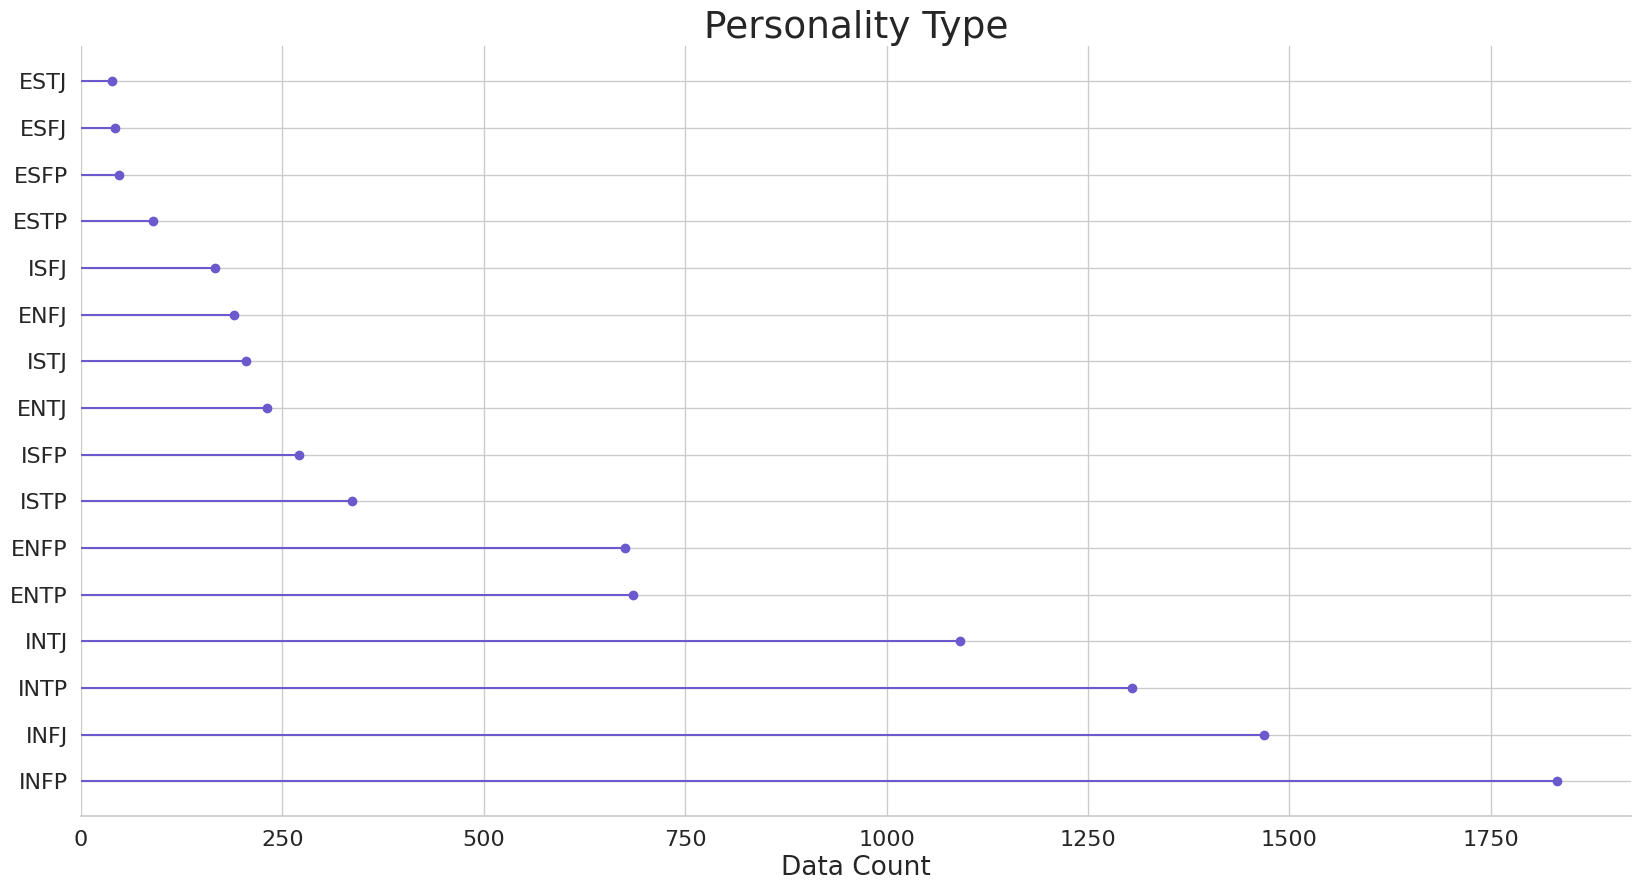

In [ ]:
type_counts = dict(data['type'].value_counts())

plt.figure(figsize=(20,10))
plt.hlines(y=type_counts.keys(), xmin=0, xmax=type_counts.values(), color='slateblue')
plt.plot(type_counts.values(),type_counts.keys(), 'o', color='slateblue')
plt.title('Personality Type', fontsize=27)
plt.xlabel('Data Count', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

**Joint Plot**

In [ ]:
data = data.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
data['words_per_comment'] = data['posts'].apply(lambda x: len(x.split())/50)
data['variance_of_word_counts'] = data['posts'].apply(lambda x: var_row(x))

<Figure size 1500x1000 with 0 Axes>

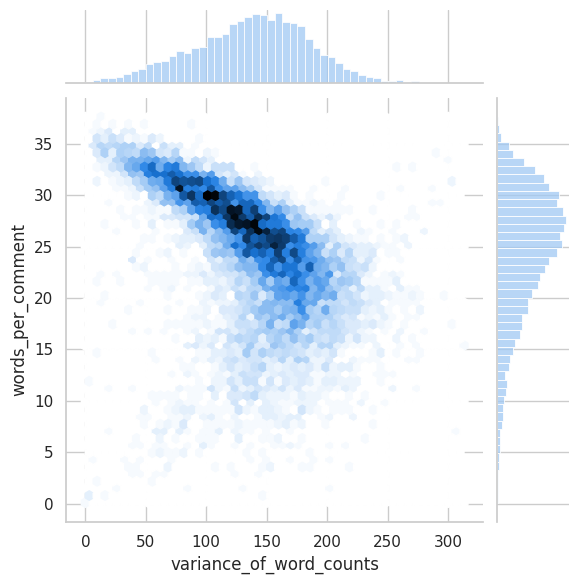

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x=data["variance_of_word_counts"],y=data["words_per_comment"],kind="hex")

**Swarm Plot of Word Count for Each Personality Type**

65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
11.0% of the points cannot be placed; you may want to decr

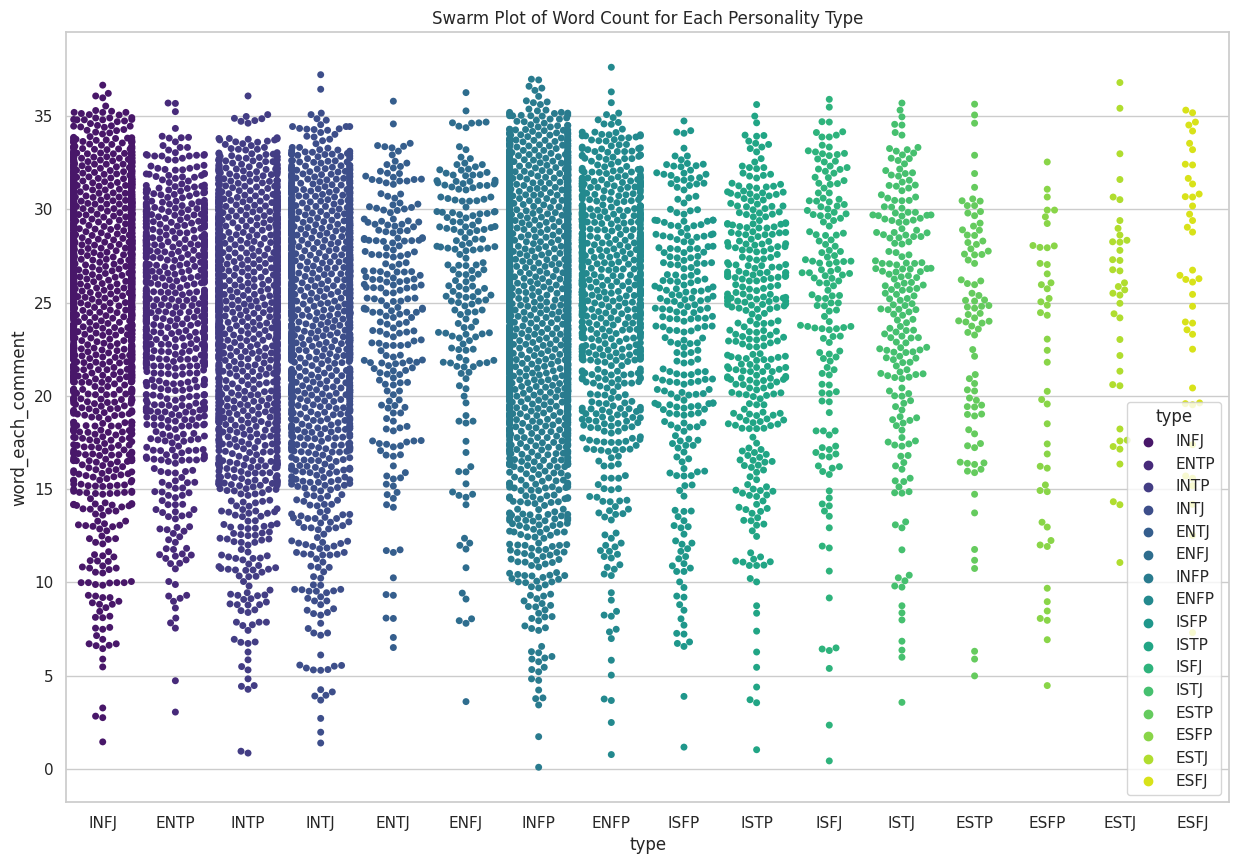

In [ ]:
data = data.copy()

# Count Number words for each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

# Count Number words per post for total 50 posts in the whole row
data['word_each_comment'] = data['posts'].apply(lambda x: len(x.split()) / 50)
data['variance_word_count'] = data['posts'].apply(lambda x: var_row(x))

plt.figure(figsize=(15, 10))
sns.swarmplot(x="type", y="word_each_comment", hue="type", data=data, palette="viridis")
plt.title('Swarm Plot of Word Count for Each Personality Type')
plt.show()


# **Outlier Analysis**

In [ ]:
# Create an interactive histogram
fig = px.histogram(data, x='post_length', nbins=50, title='Distribution of Post Lengths')
fig.update_layout(
    title='Distribution of Post Lengths',
    xaxis_title='Post Length',
    yaxis_title='Frequency',
    bargap=0.05
)
fig.show()

In [ ]:
#boxplot
fig = px.box(data, x='type', y='post_length', title='Post Length Distribution by Personality Type')
fig.update_layout(
    title='Post Length Distribution by Personality Type',
    xaxis_title='Personality Type',
    yaxis_title='Post Length',
    boxmode='group'  # Display boxplots for each category side by side
)
fig.show()

In [ ]:
from scipy import stats
# Calculate Z-scores
z_scores = stats.zscore(data['post_length'])

# Define a threshold for outliers (e.g., Z-score greater than 3 or less than -3)
outlier_threshold = 3

# Identify and remove outliers
outliers = data[(z_scores > outlier_threshold) | (z_scores < -outlier_threshold)]
data_no_outliers = data[(z_scores <= outlier_threshold) & (z_scores >= -outlier_threshold)]

In [ ]:
data = data_no_outliers.copy()
data.head(10)

type                                              posts  post_length I_E  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         4652   I   
1  ENTP  'I'm finding the lack of me in these posts ver...         7053   E   
2  INTP  'Good one  _____   https://www.youtube.com/wat...         5265   I   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...         6271   I   
4  ENTJ  'You're fired.|||That's another silly misconce...         6111   E   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...         8589   I   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...         7916   I   
7  INTJ  'I tend to build up a collection of things on ...         6900   I   
8  INFJ  I'm not sure, that's a good question. The dist...         5325   I   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...         7573   I   

  N_S T_F J_P  type_label  type_numerical  words_per_comment  \
0   N   F   J           8               0              11.12   
1   N   T   P           3               1              23.40   
2   N   T   P          11               2              16.72   
3   N   T   J          10               3              21.28   
4   N   T   J           2               4              19.34   
5   N   T   J          10               3              29.82   
6   N   F   J           8               0              26.58   
7   N   T   J          10               3              24.46   
8   N   F   J           8               0              14.76   
9   N   T   P          11               2              24.66   

   variance_of_word_counts  word_each_comment  variance_word_count  
0                 135.2900              11.12             135.2900  
1                 187.4756              23.40             187.4756  
2                 180.6900              16.72             180.6900  
3                 181.8324              21.28             181.8324  
4                 196.4576              19.34             196.4576  
5                  97.7200              29.82              97.7200  
6                 151.3664              26.58             151.3664  
7                 174.7664              24.46             174.7664  
8                 207.1124              14.76             207.1124  
9                 145.6704              24.66             145.6704

**Distribution of Post Lengths after Removal of Outliers**

In [ ]:
#histogram
fig = px.histogram(data_no_outliers, x='post_length', nbins=50, title='Distribution of Post Lengths')
fig.update_layout(
    title='Distribution of Post Lengths after removal of outliers',
    xaxis_title='Post Length',
    yaxis_title='Frequency',
    bargap=0.05
)
fig.show()

**Distribution of Personality Type Components after removal of outliers**

In [ ]:
# Extract the personality type components
data_no_outliers['I_E'] = data_no_outliers['type'].apply(lambda x: x[0])
data_no_outliers['N_S'] = data_no_outliers['type'].apply(lambda x: x[1])
data_no_outliers['T_F'] = data_no_outliers['type'].apply(lambda x: x[2])
data_no_outliers['J_P'] = data_no_outliers['type'].apply(lambda x: x[3])

# Count the occurrences of each combination
ie_counts = data_no_outliers['I_E'].value_counts().reset_index()
ns_counts = data_no_outliers['N_S'].value_counts().reset_index()
tf_counts = data_no_outliers['T_F'].value_counts().reset_index()
jp_counts = data_no_outliers['J_P'].value_counts().reset_index()

# Create subplots for each personality type component
fig = make_subplots(rows=2, cols=2, subplot_titles=('I vs. E Distribution', 'N vs. S Distribution', 'T vs. F Distribution', 'J vs. P Distribution'))

# Bar chart for 'I vs. E'
fig.add_trace(go.Bar(x=ie_counts['index'], y=ie_counts['I_E'], marker_color='blue'), row=1, col=1)
fig.update_xaxes(title_text='I vs. E', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# Bar chart for 'N vs. S'
fig.add_trace(go.Bar(x=ns_counts['index'], y=ns_counts['N_S'], marker_color='green'), row=1, col=2)
fig.update_xaxes(title_text='N vs. S', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

# Bar chart for 'T vs. F'
fig.add_trace(go.Bar(x=tf_counts['index'], y=tf_counts['T_F'], marker_color='red'), row=2, col=1)
fig.update_xaxes(title_text='T vs. F', row=2, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)

# Bar chart for 'J vs. P'
fig.add_trace(go.Bar(x=jp_counts['index'], y=jp_counts['J_P'], marker_color='purple'), row=2, col=2)
fig.update_xaxes(title_text='J vs. P', row=2, col=2)
fig.update_yaxes(title_text='Count', row=2, col=2)

# Update layout and show the plot
fig.update_layout(title_text='Distribution of Personality Type Components after removal of outliers', showlegend=False)
fig.show()

**Feature Engineering**

**1. Word Frequencies:**
Analyzing word frequencies can provide insights into the language usage patterns associated with different personality types. Certain words or phrases may be more prevalent in texts written by individuals of specific personality types

Create a bag-of-words representation of the text data, counting the frequency of each word.We use TF-IDF (Term Frequency-Inverse Document Frequency) to give more weight to rare words that might be more informative

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Function for text processing (tokenization, stopword removal, and stemming)
def process_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    return " ".join(words)

# Applying text processing to each text in the dataset
data['processed_text'] = data['posts'].apply(process_text)

# Creating a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

# Creating a DataFrame with word frequencies
word_frequencies = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequencies for each word across all texts
total_word_frequencies = word_frequencies.sum()


**Top 20 Most Frequent Words Across Personality Types**

Top 20 Most Frequent Words:
like      75086
think     57755
peopl     46569
know      39110
would     38702
get       38433
one       38049
feel      36548
realli    34715
thing     33739
time      32345
make      27160
go        27031
say       26840
want      26035
type      25301
person    24992
love      23929
much      22722
friend    21358
dtype: int64


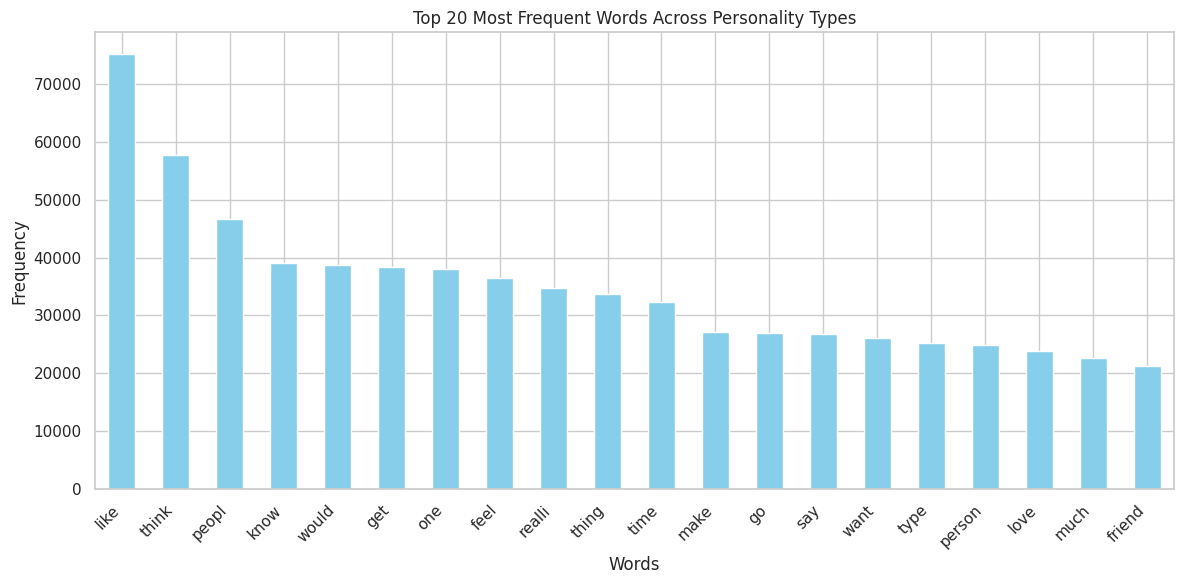

In [ ]:
# Display the most frequent words
top_words = total_word_frequencies.sort_values(ascending=False).head(20)
print("Top 20 Most Frequent Words:")
print(top_words)

# Plot the word frequencies
plt.figure(figsize=(12, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words Across Personality Types')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2.Sentiment Analysis**

In [ ]:
# Function to calculate sentiment scores using TextBlob
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Applying the sentiment analysis function to each text in the dataset
data['sentiment_score'] = data['processed_text'].apply(calculate_sentiment)

# Function to categorize sentiment scores into positive, negative, or neutral
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Applying the sentiment categorization function to create a 'sentiment' column
data['sentiment'] = data['sentiment_score'].apply(categorize_sentiment)
data.head(10)

type                                              posts  post_length I_E  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         4652   I   
1  ENTP  'I'm finding the lack of me in these posts ver...         7053   E   
2  INTP  'Good one  _____   https://www.youtube.com/wat...         5265   I   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...         6271   I   
4  ENTJ  'You're fired.|||That's another silly misconce...         6111   E   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...         8589   I   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...         7916   I   
7  INTJ  'I tend to build up a collection of things on ...         6900   I   
8  INFJ  I'm not sure, that's a good question. The dist...         5325   I   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...         7573   I   

  N_S T_F J_P  type_label  type_numerical  words_per_comment  \
0   N   F   J           8               0              11.12   
1   N   T   P           3               1              23.40   
2   N   T   P          11               2              16.72   
3   N   T   J          10               3              21.28   
4   N   T   J           2               4              19.34   
5   N   T   J          10               3              29.82   
6   N   F   J           8               0              26.58   
7   N   T   J          10               3              24.46   
8   N   F   J           8               0              14.76   
9   N   T   P          11               2              24.66   

   variance_of_word_counts  word_each_comment  variance_word_count  \
0                 135.2900              11.12             135.2900   
1                 187.4756              23.40             187.4756   
2                 180.6900              16.72             180.6900   
3                 181.8324              21.28             181.8324   
4                 196.4576              19.34             196.4576   
5                  97.7200              29.82              97.7200   
6                 151.3664              26.58             151.3664   
7                 174.7664              24.46             174.7664   
8                 207.1124              14.76             207.1124   
9                 145.6704              24.66             145.6704   

                                      processed_text  sentiment_score  \
0  intj moment sportscent top ten play experi lif...         0.078935   
1  find lack post bore posit often exampl girlfri...         0.102314   
2  one cours say know bless absolut posit best fr...         0.151360   
3  intp enjoy convers day esoter gab natur univer...         0.084252   
4  anoth silli misconcept approach logic go key u...         0.001689   
5  perfect scientist claim scientif inform revis ...         0.040104   
6  ca draw nail haha done profession nail ye gel ...         0.157553   
7  tend build collect thing desktop use frequent ...         0.092045   
8  sure good question distinct two depend percept...         0.109999   
9  posit actual let go person due variou reason u...         0.129429   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  
5  positive  
6  positive  
7  positive  
8  positive  
9  positive

**Average Sentiment Score by MBTI Type**

FixedFormatter should only be used together with FixedLocator


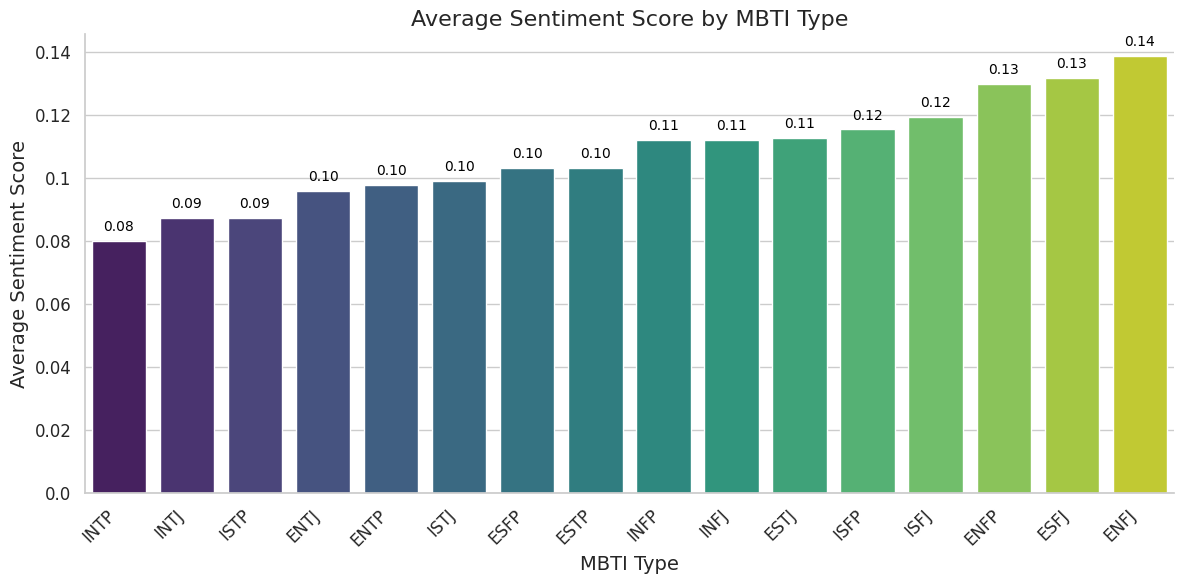

In [ ]:
# Calculate average sentiment score for each MBTI type
average_sentiment_by_type = data.groupby('type')['sentiment_score'].mean().sort_values()

sns.set(style="whitegrid", palette="pastel")

# Plotting the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_sentiment_by_type.index, y=average_sentiment_by_type.values, palette="viridis")
ax.set_title('Average Sentiment Score by MBTI Type', fontsize=16)
ax.set_xlabel('MBTI Type', fontsize=14)
ax.set_ylabel('Average Sentiment Score', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Remove the top and right spines for aesthetics
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install textstat

**3. Readability Score**

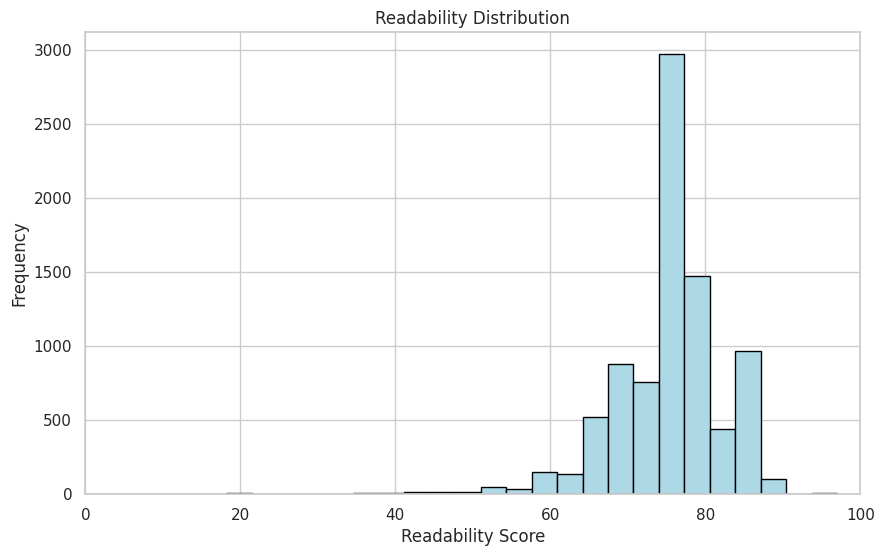

In [ ]:
import textstat

plt.figure(figsize=(10, 6))
data['readability'] = data['posts'].apply(lambda x: textstat.flesch_reading_ease(x))
# Display readability distribution
data['readability'].hist(bins=500, color='lightblue', edgecolor='black')

# Set x-axis limits to focus on the range between 0 and 100
plt.xlim(0, 100)

# Add labels and title
plt.xlabel('Readability Score')
plt.ylabel('Frequency')
plt.title('Readability Distribution')

# Show the plot
plt.show()

In [ ]:
data.head(10)

type                                              posts  post_length I_E  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         4652   I   
1  ENTP  'I'm finding the lack of me in these posts ver...         7053   E   
2  INTP  'Good one  _____   https://www.youtube.com/wat...         5265   I   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...         6271   I   
4  ENTJ  'You're fired.|||That's another silly misconce...         6111   E   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...         8589   I   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...         7916   I   
7  INTJ  'I tend to build up a collection of things on ...         6900   I   
8  INFJ  I'm not sure, that's a good question. The dist...         5325   I   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...         7573   I   

  N_S T_F J_P  type_label  type_numerical  words_per_comment  \
0   N   F   J           8               0              11.12   
1   N   T   P           3               1              23.40   
2   N   T   P          11               2              16.72   
3   N   T   J          10               3              21.28   
4   N   T   J           2               4              19.34   
5   N   T   J          10               3              29.82   
6   N   F   J           8               0              26.58   
7   N   T   J          10               3              24.46   
8   N   F   J           8               0              14.76   
9   N   T   P          11               2              24.66   

   variance_of_word_counts  word_each_comment  variance_word_count  \
0                 135.2900              11.12             135.2900   
1                 187.4756              23.40             187.4756   
2                 180.6900              16.72             180.6900   
3                 181.8324              21.28             181.8324   
4                 196.4576              19.34             196.4576   
5                  97.7200              29.82              97.7200   
6                 151.3664              26.58             151.3664   
7                 174.7664              24.46             174.7664   
8                 207.1124              14.76             207.1124   
9                 145.6704              24.66             145.6704   

                                      processed_text  sentiment_score  \
0  intj moment sportscent top ten play experi lif...         0.078935   
1  find lack post bore posit often exampl girlfri...         0.102314   
2  one cours say know bless absolut posit best fr...         0.151360   
3  intp enjoy convers day esoter gab natur univer...         0.084252   
4  anoth silli misconcept approach logic go key u...         0.001689   
5  perfect scientist claim scientif inform revis ...         0.040104   
6  ca draw nail haha done profession nail ye gel ...         0.157553   
7  tend build collect thing desktop use frequent ...         0.092045   
8  sure good question distinct two depend percept...         0.109999   
9  posit actual let go person due variou reason u...         0.129429   

  sentiment  readability  
0  positive        60.82  
1  positive        78.35  
2  positive        75.71  
3  positive        77.23  
4  positive        69.28  
5  positive        77.43  
6  positive        76.22  
7  positive        73.47  
8  positive        66.13  
9  positive        73.98

**Word Cloud**

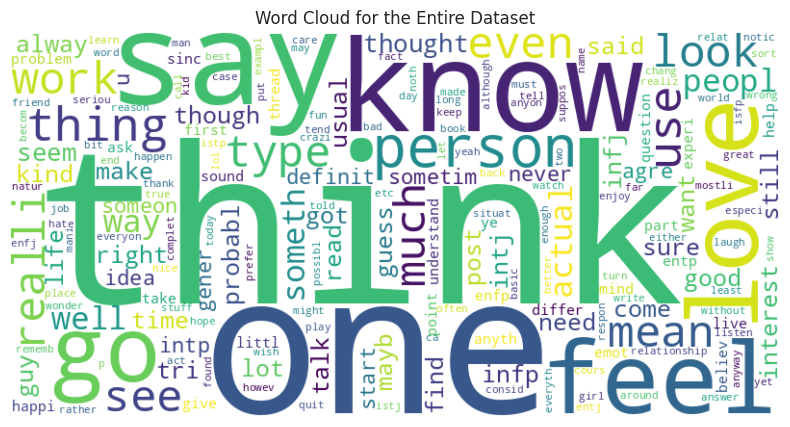

In [ ]:
#WordCloud for the entire dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for the Entire Dataset')
plt.show()

**WordClouds for each personality type**

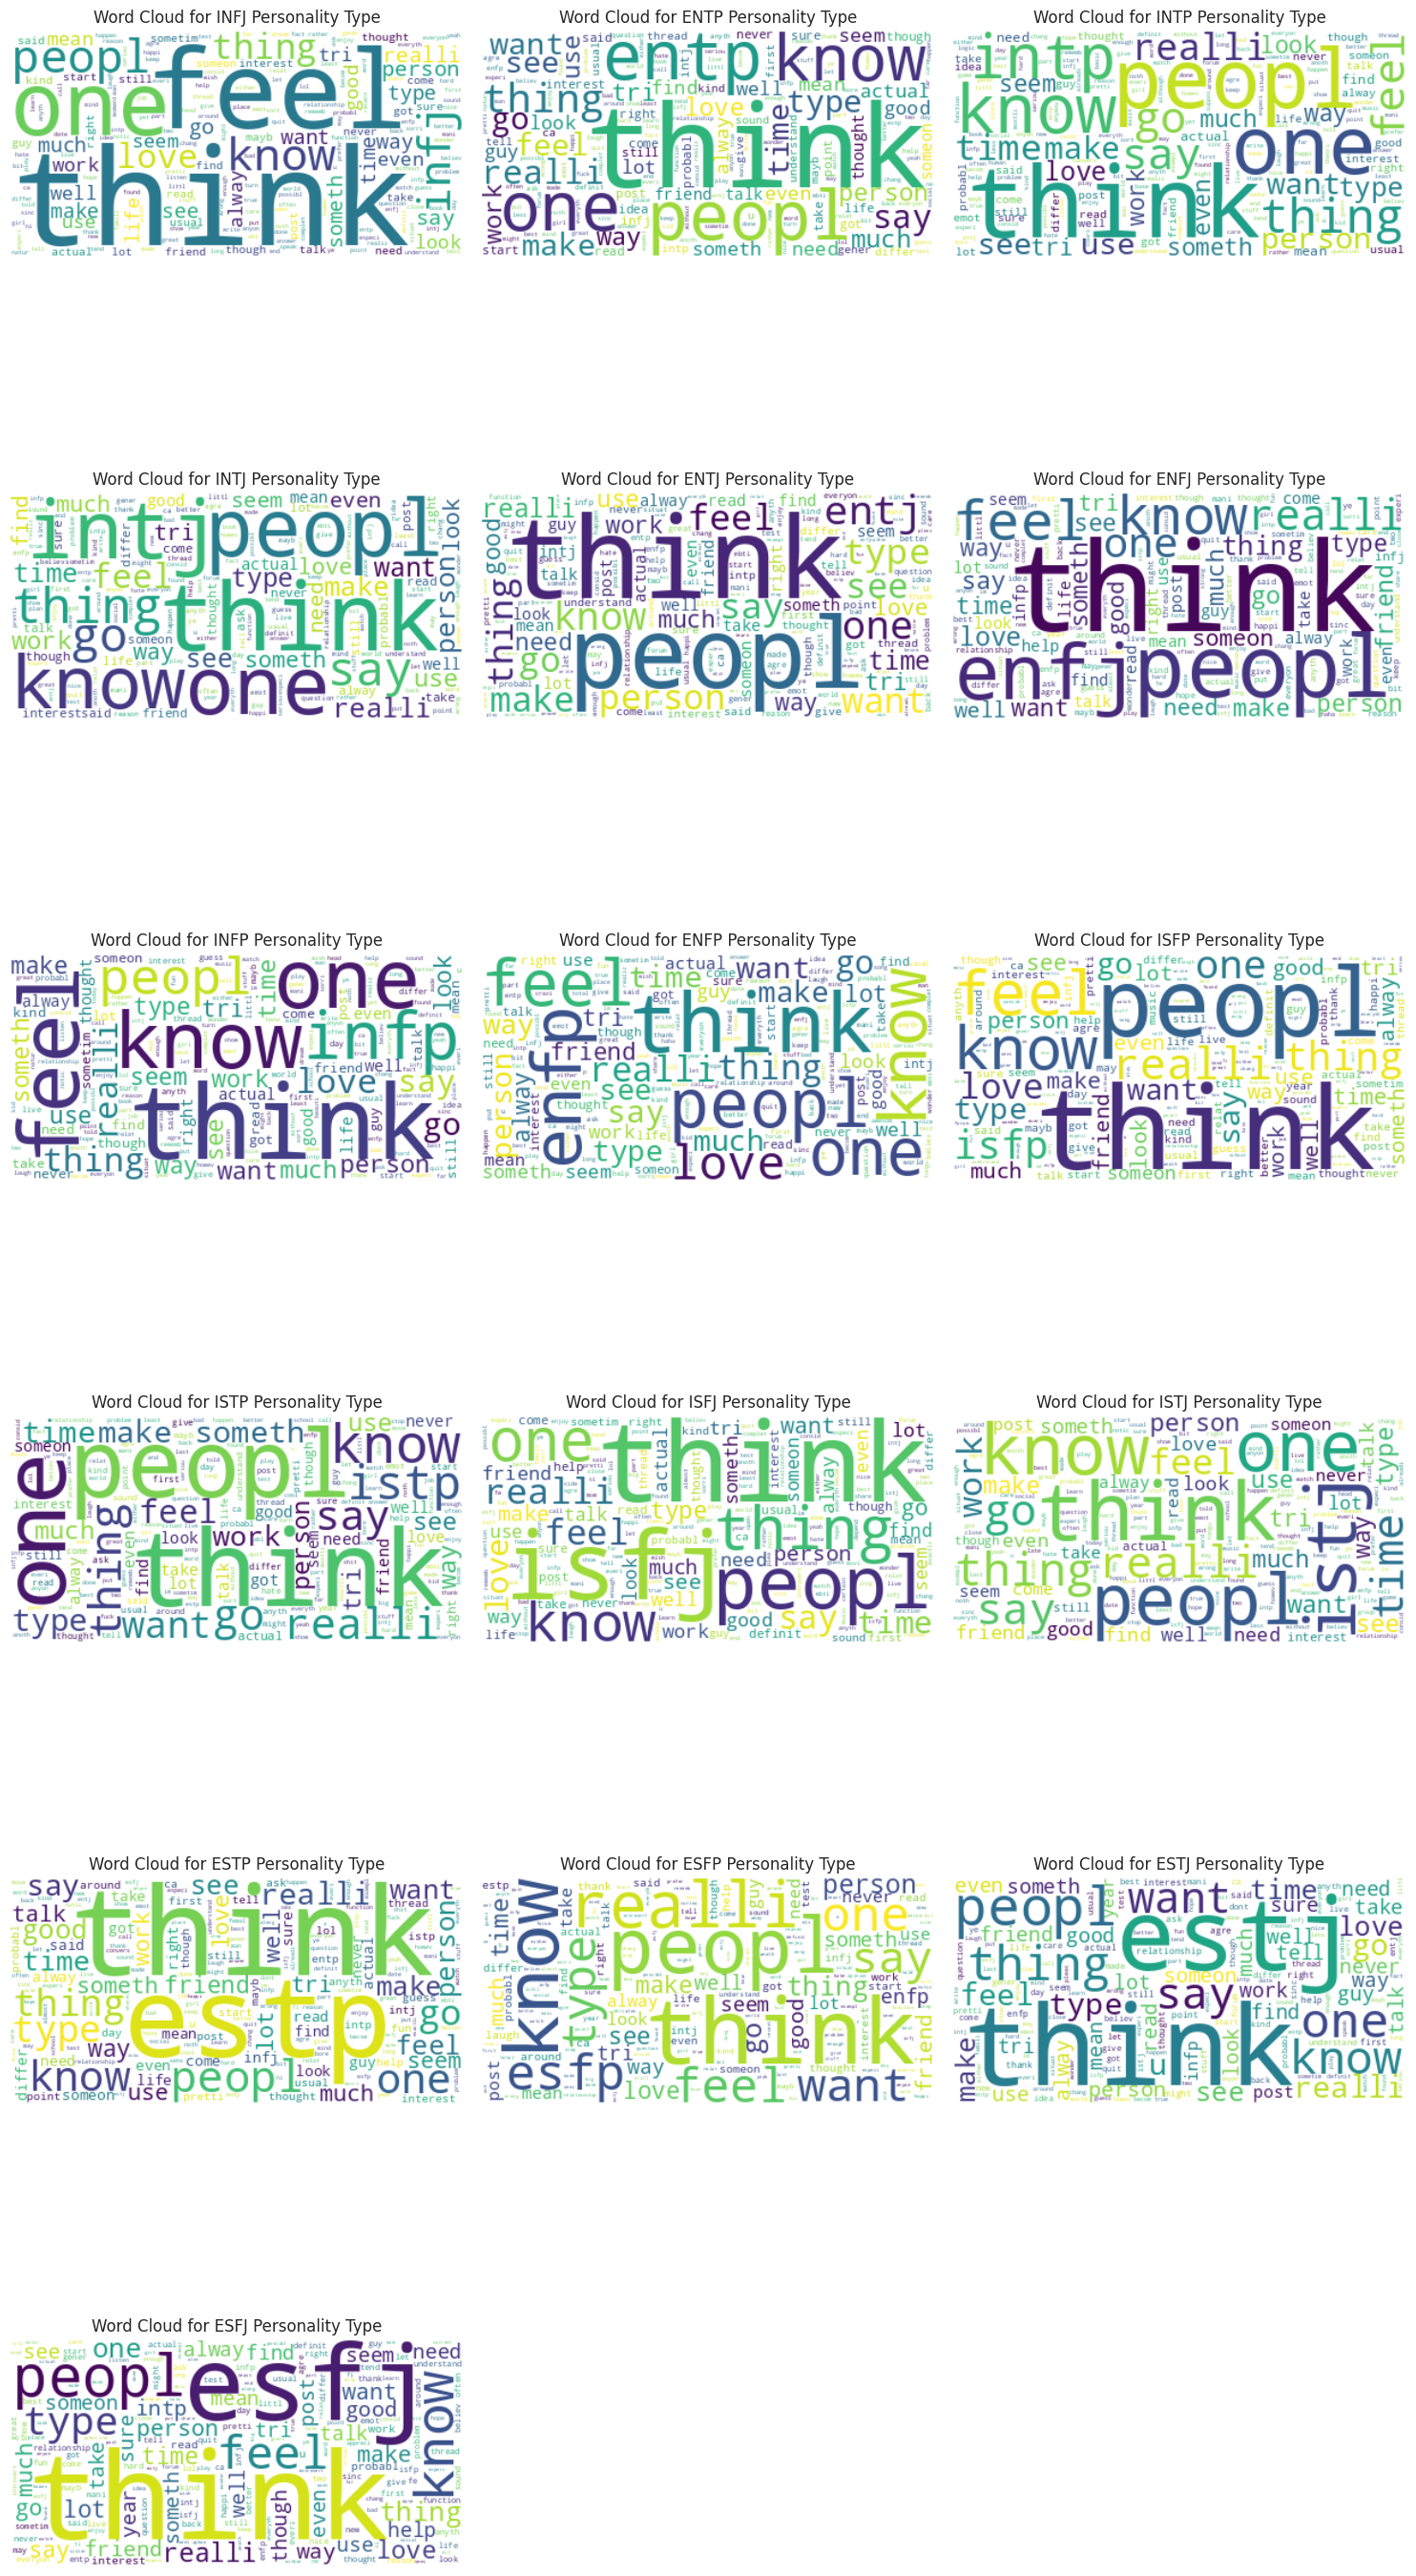

In [ ]:
#WordClouds for each personality type arranged in a grid
types = data['type'].unique()

num_types = len(types)
num_columns = 3
num_rows = math.ceil(num_types / num_columns)
plt.figure(figsize=(15, 5 * num_rows))

# Generate and display WordClouds for each personality type
for i, personality_type in enumerate(types, start=1):
    type_df = data[data['type'] == personality_type]

    # Adjust the WordCloud size
    type_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(" ".join(type_df['processed_text']))

    # Create subplots for each personality type
    plt.subplot(num_rows, num_columns, i)

    # Display the WordCloud
    plt.imshow(type_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {personality_type} Personality Type')

plt.tight_layout()
plt.show()

**Top 10 Most Frequent Part-of-Speech Tags:**

Part-of-speech tagging involves labeling each word in a text with its grammatical category (noun, verb, adjective, etc.). Analyzing the distribution of parts of speech can provide insights into writing styles associated with different personality types

We Use natural language processing libraries (NLTK, spaCy) to perform part-of-speech tagging on the text data.

In [ ]:
nltk.download('averaged_perceptron_tagger')

# NLTK part-of-speech tagging
def pos_tagging_nltk(words):
    return pos_tag(words)

# Apply NLTK part-of-speech tagging to each processed text
data['pos_tags_nltk'] = data['processed_text'].apply(lambda x: pos_tagging_nltk(x.split()))

# spaCy part-of-speech tagging
nlp = spacy.load('en_core_web_sm')

def pos_tagging_spacy(text):
    doc = nlp(" ".join(text))
    return [(token.text, token.pos_) for token in doc]

# Apply spaCy part-of-speech tagging to each processed text
data['pos_tags_spacy'] = data['processed_text'].apply(lambda x: pos_tagging_spacy(x.split()))

# Extract part-of-speech tags and flatten the lists
pos_tags_flat_nltk = [tag[1] for tags in data['pos_tags_nltk'] for tag in tags]
pos_tags_flat_spacy = [tag[1] for tags in data['pos_tags_spacy'] for tag in tags]

# Create DataFrames with part-of-speech frequencies
pos_frequencies_nltk = pd.Series(pos_tags_flat_nltk).value_counts()
pos_frequencies_spacy = pd.Series(pos_tags_flat_spacy).value_counts()

# Display the top 10 most frequent part-of-speech tags for NLTK
print("Top 10 Most Frequent Part-of-Speech Tags (NLTK):")
print(pos_frequencies_nltk.head(10))

# Display the top 10 most frequent part-of-speech tags for spaCy
print("\nTop 10 Most Frequent Part-of-Speech Tags (spaCy):")
print(pos_frequencies_spacy.head(10))

# Plot the part-of-speech frequencies for NLTK
plt.figure(figsize=(12, 6))
pos_frequencies_nltk.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Part-of-Speech Tags (NLTK)')
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the part-of-speech frequencies for spaCy
plt.figure(figsize=(12, 6))
pos_frequencies_spacy.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Part-of-Speech Tags (spaCy)')
plt.xlabel('Part-of-Speech Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


KeyboardInterrupt: ignored

**TFIDF VECTORIZATION**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode the MBTI types to numerical labels
label_encoder = LabelEncoder()
data['encoded_type'] = label_encoder.fit_transform(data['type'])

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['processed_text'], data['encoded_type'], test_size=0.2, random_state=42
)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
tfidf_train_matrix = tfidf_vectorizer.fit_transform(train_data)

# Transform the test data
tfidf_test_matrix = tfidf_vectorizer.transform(test_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Print the unique values of 'encoded_type' and their corresponding 'type'
unique_encoded_types = data['encoded_type'].unique()
for encoded_type in unique_encoded_types:
    corresponding_type = label_encoder.inverse_transform([encoded_type])[0]
    print(f'Encoded Type: {encoded_type}, Corresponding Type: {corresponding_type}')


Encoded Type: 8, Corresponding Type: INFJ
Encoded Type: 3, Corresponding Type: ENTP
Encoded Type: 11, Corresponding Type: INTP
Encoded Type: 10, Corresponding Type: INTJ
Encoded Type: 2, Corresponding Type: ENTJ
Encoded Type: 0, Corresponding Type: ENFJ
Encoded Type: 9, Corresponding Type: INFP
Encoded Type: 1, Corresponding Type: ENFP
Encoded Type: 13, Corresponding Type: ISFP
Encoded Type: 15, Corresponding Type: ISTP
Encoded Type: 12, Corresponding Type: ISFJ
Encoded Type: 14, Corresponding Type: ISTJ
Encoded Type: 7, Corresponding Type: ESTP
Encoded Type: 5, Corresponding Type: ESFP
Encoded Type: 6, Corresponding Type: ESTJ
Encoded Type: 4, Corresponding Type: ESFJ


In [ ]:
data.head(10)

type                                              posts  post_length I_E  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         4652   I   
1  ENTP  'I'm finding the lack of me in these posts ver...         7053   E   
2  INTP  'Good one  _____   https://www.youtube.com/wat...         5265   I   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...         6271   I   
4  ENTJ  'You're fired.|||That's another silly misconce...         6111   E   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...         8589   I   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...         7916   I   
7  INTJ  'I tend to build up a collection of things on ...         6900   I   
8  INFJ  I'm not sure, that's a good question. The dist...         5325   I   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...         7573   I   

  N_S T_F J_P  type_label  type_numerical  words_per_comment  \
0   N   F   J           8               0              11.12   
1   N   T   P           3               1              23.40   
2   N   T   P          11               2              16.72   
3   N   T   J          10               3              21.28   
4   N   T   J           2               4              19.34   
5   N   T   J          10               3              29.82   
6   N   F   J           8               0              26.58   
7   N   T   J          10               3              24.46   
8   N   F   J           8               0              14.76   
9   N   T   P          11               2              24.66   

   variance_of_word_counts  word_each_comment  variance_word_count  \
0                 135.2900              11.12             135.2900   
1                 187.4756              23.40             187.4756   
2                 180.6900              16.72             180.6900   
3                 181.8324              21.28             181.8324   
4                 196.4576              19.34             196.4576   
5                  97.7200              29.82              97.7200   
6                 151.3664              26.58             151.3664   
7                 174.7664              24.46             174.7664   
8                 207.1124              14.76             207.1124   
9                 145.6704              24.66             145.6704   

                                      processed_text  sentiment_score  \
0  intj moment sportscent top ten play experi lif...         0.078935   
1  find lack post bore posit often exampl girlfri...         0.102314   
2  one cours say know bless absolut posit best fr...         0.151360   
3  intp enjoy convers day esoter gab natur univer...         0.084252   
4  anoth silli misconcept approach logic go key u...         0.001689   
5  perfect scientist claim scientif inform revis ...         0.040104   
6  ca draw nail haha done profession nail ye gel ...         0.157553   
7  tend build collect thing desktop use frequent ...         0.092045   
8  sure good question distinct two depend percept...         0.109999   
9  posit actual let go person due variou reason u...         0.129429   

  sentiment  readability  encoded_type  
0  positive        60.82             8  
1  positive        78.35             3  
2  positive        75.71            11  
3  positive        77.23            10  
4  positive        69.28             2  
5  positive        77.43            10  
6  positive        76.22             8  
7  positive        73.47            10  
8  positive        66.13             8  
9  positive        73.98            11

**MODELS**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(multi_class='ovr',max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
# Train and evaluate pipelines
classifiers = [('Naive Bayes', nb_pipeline),
               ('Logistic Regression', lr_pipeline),
               ('Linear SVC', svc_pipeline),('KNN',knn_pipeline),
               ('Random Forest', rf_pipeline)]
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data, train_labels)

    # Predict
    predictions = pipeline.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    # Evaluate
    print(f"{clf_name} Metrics:")
    print(f"           Accuracy: {accuracy:.2%}")
    print(f"           Precision: {precision:.2%}")
    print(f"           Recall: {recall:.2%}")
    print(f"           F1 Score: {f1:.2%}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Metrics:
           Accuracy: 35.27%
           Precision: 36.02%
           Recall: 35.27%
           F1 Score: 26.11%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Metrics:
           Accuracy: 64.32%
           Precision: 66.00%
           Recall: 64.32%
           F1 Score: 62.23%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVC Metrics:
           Accuracy: 62.82%
           Precision: 63.40%
           Recall: 62.82%
           F1 Score: 62.25%
KNN Metrics:
           Accuracy: 36.95%
           Precision: 44.63%
           Recall: 36.95%
           F1 Score: 33.75%
Random Forest Metrics:
           Accuracy: 51.07%
           Precision: 57.05%
           Recall: 51.07%
           F1 Score: 45.87%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**UnderSampling**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
train_data_resampled, train_labels_resampled = rus.fit_resample(train_data.values.reshape(-1, 1), train_labels)

# Convert the resampled data back to Series
train_data_resampled = pd.Series(train_data_resampled.flatten())

# Train and evaluate pipelines with undersampling
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data_resampled, train_labels_resampled)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With Random Undersampling):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()

Naive Bayes Metrics (With Random Undersampling):
  Accuracy: 31.43%
  Precision: 56.98%
  Recall: 31.43%
  F1 Score: 32.50%

Logistic Regression Metrics (With Random Undersampling):
  Accuracy: 53.61%
  Precision: 62.40%
  Recall: 53.61%
  F1 Score: 55.84%

Linear SVC Metrics (With Random Undersampling):
  Accuracy: 51.05%
  Precision: 59.18%
  Recall: 51.05%
  F1 Score: 52.98%

Random Forest Metrics (With Random Undersampling):
  Accuracy: 35.04%
  Precision: 46.90%
  Recall: 35.04%
  F1 Score: 37.03%



**Random OverSampling**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
ros = RandomOverSampler(random_state=42)
train_data_resampled, train_labels_resampled = ros.fit_resample(train_data.values.reshape(-1, 1), train_labels)

# Convert the resampled data back to Series
train_data_resampled = pd.Series(train_data_resampled.flatten())

# Train and evaluate pipelines with oversampling
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data_resampled, train_labels_resampled)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With Random Oversampling):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()

Naive Bayes Metrics (With Random Oversampling):
  Accuracy: 49.77%
  Precision: 52.13%
  Recall: 49.77%
  F1 Score: 50.28%

Logistic Regression Metrics (With Random Oversampling):
  Accuracy: 66.41%
  Precision: 67.27%
  Recall: 66.41%
  F1 Score: 66.55%



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Linear SVC Metrics (With Random Oversampling):
  Accuracy: 59.37%
  Precision: 59.02%
  Recall: 59.37%
  F1 Score: 59.07%

Random Forest Metrics (With Random Oversampling):
  Accuracy: 60.01%
  Precision: 59.87%
  Recall: 60.01%
  F1 Score: 58.28%



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**SMOTE**

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)
# Create pipelines
nb_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('nb', nb_classifier)
])

lr_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('lr', lr_classifier)
])

svc_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('svc', svc_classifier)
])

knn_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('knn', knn_classifier)
])
rf_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('rf', rf_classifier)
])

# Train and evaluate pipelines with SMOTE
classifiers = [('Naive Bayes', nb_pipeline),
               ('Logistic Regression', lr_pipeline),
               ('Linear SVC', svc_pipeline),('KNN',knn_pipeline)
               ('Random Forest', rf_pipeline)]

for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data, train_labels)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With SMOTE):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()


Naive Bayes Metrics (With SMOTE):
  Accuracy: 49.53%
  Precision: 51.68%
  Recall: 49.53%
  F1 Score: 49.99%

Logistic Regression Metrics (With SMOTE):
  Accuracy: 66.53%
  Precision: 67.41%
  Recall: 66.53%
  F1 Score: 66.62%

Linear SVC Metrics (With SMOTE):
  Accuracy: 60.83%
  Precision: 60.92%
  Recall: 60.83%
  F1 Score: 60.60%

Random Forest Metrics (With SMOTE):
  Accuracy: 56.46%
  Precision: 57.85%
  Recall: 56.46%
  F1 Score: 54.47%



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Saving the model as pickle file to avoid running the model everytime while predicting

In [ ]:
import pickle

# Specify the file name where you want to save the model
file_name = "model.pkl"

# Open a file in binary write mode and save the model
with open(file_name, 'wb') as file:
    pickle.dump(lr_pipeline, file)

In [ ]:
data = data.replace(['INTJ', 'INTP', 'ENTJ', 'ENTP' ], 'Analysts')

data = data.replace(['INFJ', 'INFP', 'ENFJ', 'ENFP'], 'Diplomats')

data = data.replace(['ISTJ', 'ISFJ', 'ESTJ', 'ESFJ'], 'Sentinels')

data = data.replace(['ISTP', 'ISFP', 'ESTP', 'ESFP'], 'Explorers')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode the MBTI types to numerical labels
label_encoder = LabelEncoder()
data['encoded_type'] = label_encoder.fit_transform(data['type'])

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['processed_text'], data['encoded_type'], test_size=0.2, random_state=42
)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
tfidf_train_matrix = tfidf_vectorizer.fit_transform(train_data)

# Transform the test data
tfidf_test_matrix = tfidf_vectorizer.transform(test_data)

In [ ]:
data.head(10)

type                                              posts  post_length  \
0  Diplomats  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...         4652   
1   Analysts  'I'm finding the lack of me in these posts ver...         7053   
2   Analysts  'Good one  _____   https://www.youtube.com/wat...         5265   
3   Analysts  'Dear INTP,   I enjoyed our conversation the o...         6271   
4   Analysts  'You're fired.|||That's another silly misconce...         6111   
5   Analysts  '18/37 @.@|||Science  is not perfect. No scien...         8589   
6  Diplomats  'No, I can't draw on my own nails (haha). Thos...         7916   
7   Analysts  'I tend to build up a collection of things on ...         6900   
8  Diplomats  I'm not sure, that's a good question. The dist...         5325   
9   Analysts  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...         7573   

  I_E N_S T_F J_P  type_label  type_numerical  words_per_comment  \
0   I   N   F   J           8               0              11.12   
1   E   N   T   P           3               1              23.40   
2   I   N   T   P          11               2              16.72   
3   I   N   T   J          10               3              21.28   
4   E   N   T   J           2               4              19.34   
5   I   N   T   J          10               3              29.82   
6   I   N   F   J           8               0              26.58   
7   I   N   T   J          10               3              24.46   
8   I   N   F   J           8               0              14.76   
9   I   N   T   P          11               2              24.66   

   variance_of_word_counts  word_each_comment  variance_word_count  \
0                 135.2900              11.12             135.2900   
1                 187.4756              23.40             187.4756   
2                 180.6900              16.72             180.6900   
3                 181.8324              21.28             181.8324   
4                 196.4576              19.34             196.4576   
5                  97.7200              29.82              97.7200   
6                 151.3664              26.58             151.3664   
7                 174.7664              24.46             174.7664   
8                 207.1124              14.76             207.1124   
9                 145.6704              24.66             145.6704   

                                      processed_text  sentiment_score  \
0  intj moment sportscent top ten play experi lif...         0.078935   
1  find lack post bore posit often exampl girlfri...         0.102314   
2  one cours say know bless absolut posit best fr...         0.151360   
3  intp enjoy convers day esoter gab natur univer...         0.084252   
4  anoth silli misconcept approach logic go key u...         0.001689   
5  perfect scientist claim scientif inform revis ...         0.040104   
6  ca draw nail haha done profession nail ye gel ...         0.157553   
7  tend build collect thing desktop use frequent ...         0.092045   
8  sure good question distinct two depend percept...         0.109999   
9  posit actual let go person due variou reason u...         0.129429   

  sentiment  readability                                      pos_tags_nltk  \
0  positive        60.82  [(intj, JJ), (moment, NN), (sportscent, NN), (...   
1  positive        78.35  [(find, VB), (lack, NN), (post, NN), (bore, IN...   
2  positive        75.71  [(one, CD), (cours, NNS), (say, VBP), (know, V...   
3  positive        77.23  [(intp, NN), (enjoy, NN), (convers, NNS), (day...   
4  positive        69.28  [(anoth, DT), (silli, NN), (misconcept, VBD), ...   
5  positive        77.43  [(perfect, JJ), (scientist, NN), (claim, NN), ...   
6  positive        76.22  [(ca, MD), (draw, VB), (nail, JJ), (haha, NN),...   
7  positive        73.47  [(tend, VB), (build, NN), (collect, JJ), (thin...   
8  positive        66.13  [(sure, RB), (good, JJ), (question, NN), (dist...   
9  positive  

**MODELS**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
# Train and evaluate pipelines
classifiers = [('Naive Bayes', nb_pipeline),
               ('Logistic Regression', lr_pipeline),
               ('Linear SVC', svc_pipeline),
               ('Random Forest', rf_pipeline)]
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data, train_labels)

    # Predict
    predictions = pipeline.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    # Evaluate
    print(f"{clf_name} Metrics:")
    print(f"           Accuracy: {accuracy:.2%}")
    print(f"           Precision: {precision:.2%}")
    print(f"           Recall: {recall:.2%}")
    print(f"           F1 Score: {f1:.2%}")

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Naive Bayes Metrics:
           Accuracy: 67.29%
           Precision: 59.41%
           Recall: 67.29%
           F1 Score: 62.00%
Logistic Regression Metrics:
           Accuracy: 78.52%
           Precision: 78.14%
           Recall: 78.52%
           F1 Score: 76.89%
Linear SVC Metrics:
           Accuracy: 77.76%
           Precision: 77.20%
           Recall: 77.76%
           F1 Score: 77.02%
Random Forest Metrics:
           Accuracy: 71.25%
           Precision: 62.07%
           Recall: 71.25%
           F1 Score: 65.97%


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**UnderSampling**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
# Apply random undersampling
rus = RandomUnderSampler(random_state=42)
train_data_resampled, train_labels_resampled = rus.fit_resample(train_data.values.reshape(-1, 1), train_labels)

# Convert the resampled data back to Series
train_data_resampled = pd.Series(train_data_resampled.flatten())

# Train and evaluate pipelines with undersampling
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data_resampled, train_labels_resampled)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With Random Undersampling):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()

Naive Bayes Metrics (With Random Undersampling):
  Accuracy: 65.95%
  Precision: 74.37%
  Recall: 65.95%
  F1 Score: 67.99%

Logistic Regression Metrics (With Random Undersampling):
  Accuracy: 74.21%
  Precision: 78.74%
  Recall: 74.21%
  F1 Score: 75.53%

Linear SVC Metrics (With Random Undersampling):
  Accuracy: 71.36%
  Precision: 76.81%
  Recall: 71.36%
  F1 Score: 72.89%

Random Forest Metrics (With Random Undersampling):
  Accuracy: 61.99%
  Precision: 70.54%
  Recall: 61.99%
  F1 Score: 64.55%



**Random OverSampling**

In [ ]:
# Define classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(max_iter=1000)
svc_classifier = LinearSVC()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipelines
nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('nb', nb_classifier)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lr', lr_classifier)
])

svc_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('svc', svc_classifier)
])

knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])

rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', rf_classifier)
])

In [ ]:
ros = RandomOverSampler(random_state=42)
train_data_resampled, train_labels_resampled = ros.fit_resample(train_data.values.reshape(-1, 1), train_labels)

# Convert the resampled data back to Series
train_data_resampled = pd.Series(train_data_resampled.flatten())

# Train and evaluate pipelines with oversampling
for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data_resampled, train_labels_resampled)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With Random Oversampling):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()

Naive Bayes Metrics (With Random Oversampling):
  Accuracy: 70.55%
  Precision: 71.82%
  Recall: 70.55%
  F1 Score: 71.09%

Logistic Regression Metrics (With Random Oversampling):
  Accuracy: 78.00%
  Precision: 79.12%
  Recall: 78.00%
  F1 Score: 78.43%

Linear SVC Metrics (With Random Oversampling):
  Accuracy: 74.85%
  Precision: 75.26%
  Recall: 74.85%
  F1 Score: 75.02%

Random Forest Metrics (With Random Oversampling):
  Accuracy: 70.31%
  Precision: 64.76%
  Recall: 70.31%
  F1 Score: 65.61%



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


**SMOTE**

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Create pipelines
nb_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('nb', nb_classifier)
])

lr_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('lr', lr_classifier)
])

svc_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('svc', svc_classifier)
])
knn_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('knn', knn_classifier)
])
rf_pipeline = ImbPipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', SMOTE(random_state=42)),
    ('rf', rf_classifier)
])

# Train and evaluate pipelines with SMOTE
classifiers = [('Naive Bayes', nb_pipeline),
               ('Logistic Regression', lr_pipeline),
               ('Linear SVC', svc_pipeline),('KNN',knn_pipeline)
               ('Random Forest', rf_pipeline)]

for clf_name, pipeline in classifiers:
    # Train
    pipeline.fit(train_data, train_labels)

    # Predict
    predictions = pipeline.predict(test_data)

    # Evaluate
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"{clf_name} Metrics (With SMOTE):")
    print(f"  Accuracy: {accuracy:.2%}")
    print(f"  Precision: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1 Score: {f1:.2%}")
    print()


Naive Bayes Metrics (With SMOTE):
  Accuracy: 68.34%
  Precision: 70.50%
  Recall: 68.34%
  F1 Score: 69.23%

Logistic Regression Metrics (With SMOTE):
  Accuracy: 77.65%
  Precision: 78.70%
  Recall: 77.65%
  F1 Score: 78.03%

Linear SVC Metrics (With SMOTE):
  Accuracy: 75.20%
  Precision: 75.51%
  Recall: 75.20%
  F1 Score: 75.33%

Random Forest Metrics (With SMOTE):
  Accuracy: 68.51%
  Precision: 68.25%
  Recall: 68.51%
  F1 Score: 64.57%

